Clustering in progress: 100%|██████████| 2198/2198 [00:11<00:00, 188.82it/s]


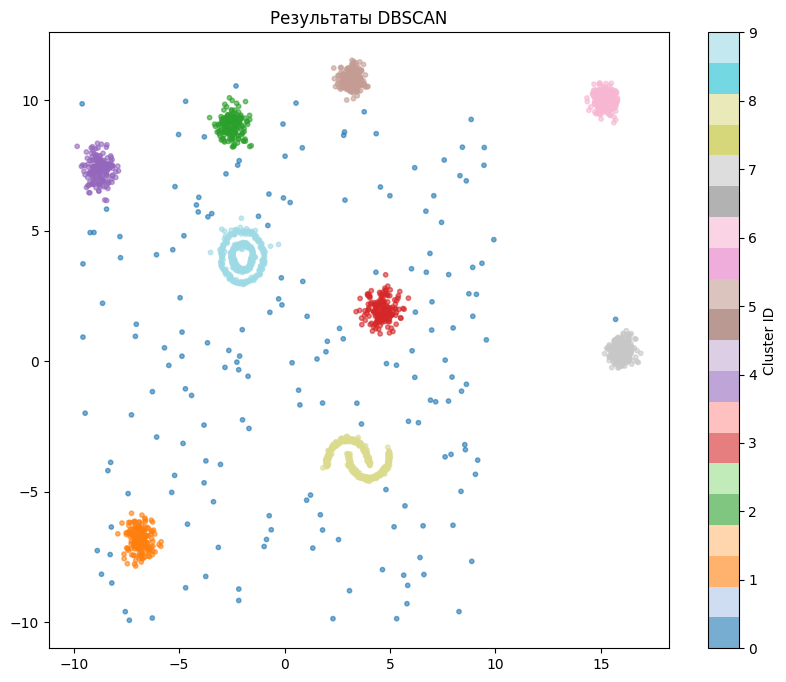

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from models.dbscan import DBSCAN
from sklearn.datasets import make_blobs, make_moons, make_circles

def generate_complex_clusters(n_samples=2000, noise=0.05):
    blobs1, _ = make_blobs(n_samples=n_samples//3, centers=4, cluster_std=0.4, random_state=42)
    blobs2, _ = make_blobs(n_samples=n_samples//3, centers=3, cluster_std=0.3, random_state=24)
    moons, _ = make_moons(n_samples=n_samples//6, noise=noise, random_state=42)
    circles, _ = make_circles(n_samples=n_samples//6, noise=noise, factor=0.5, random_state=42)
    
    blobs2[:, 0] += 6
    blobs2[:, 1] += 6
    moons[:, 0] += 3
    moons[:, 1] -= 4
    circles[:, 0] -= 2
    circles[:, 1] += 4
    
    random_noise = np.random.uniform(low=-10, high=10, size=(n_samples//10, 2))
    
    X = np.vstack([blobs1, blobs2, moons, circles, random_noise])
    
    return X
X = generate_complex_clusters(n_samples=2000)

dbscan = DBSCAN(eps=0.5, min_samples=10, verbose=True)
labels = dbscan.fit(X)

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, alpha=0.6, cmap='tab20')
plt.title("Результаты DBSCAN")
plt.colorbar(label='Cluster ID')
plt.show()